# PREPROCESSING

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#pemanggilan data
data = pd.read_csv("pcos_dataset.csv")

In [33]:
data.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


Setiap baris dalam dataset ini mewakili satu pasien *Polycystic Ovary Syndrome* (PCOS) yaitu kelainan hormonal umum yang memengaruhi wanita usia reproduksi, dan kolom-kolomnya merupakan atribut klinis yang diamati pada pasien-pasien tersebut. Berikut adalah penjelasan dari setiap variabelnya:
- **Age** (years): Usia pasien, berkisar antara 18 hingga 45 tahun.
- **BMI** (kg/m²): Indeks Massa Tubuh, yang merupakan ukuran lemak tubuh berdasarkan tinggi dan berat badan, berkisar antara 18 hingga 35.
- **Menstrual_Irregularity** (binary): Indikator biner yang menunjukkan apakah pasien memiliki siklus menstruasi yang tidak teratur (0 = Tidak, 1 = Ya).
- **Testosterone_Level** (ng/dL): Kadar testosteron dalam darah pasien, indikator hormonal penting PCOS, berkisar antara 20 hingga 100 ng/dL.
- **Antral_Follicle_Coun**t: Jumlah folikel antral yang terdeteksi selama USG, berkisar antara 5 hingga 30, yang membantu dalam menilai cadangan ovarium dan keberadaan PCOS.
- **PCOS_Diagnosis** (binary): Indikator biner apakah pasien telah didiagnosis dengan PCOS (0 = Tidak, 1 = Ya), berdasarkan kombinasi faktor risiko seperti BMI tinggi, kadar testosteron, menstruasi tidak teratur, dan jumlah folikel antral.

Dataset ini menyediakan informasi penting terkait kondisi kesehatan PCOS pasien dan sangat berguna untuk analisis prediktif dalam mendeteksi risiko penyakit PCOS berdasarkan data klinis.

In [34]:
data.tail(5)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


In [35]:
#melihat statistika deskriptif
data.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


Berdasarkan output di atas, dapat disimpulkan bahwa dataset tersebut memiliki total 6 kolom.
Kolom-kolom pada dataset ini memiliki dua tipe data, yaitu integer dan float. Dengan demikian, tidak perlu dilakukan proses encoding data.
Jumlah maksimal baris untuk setiap kolom adalah 1000 baris. Karena seluruh kolom sudah memiliki 1000 baris (tidak ada data yang hilang), maka tidak perlu dilakukan penanganan missing value.

**CEK OUTLIER**

**Cek Outlier**
Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

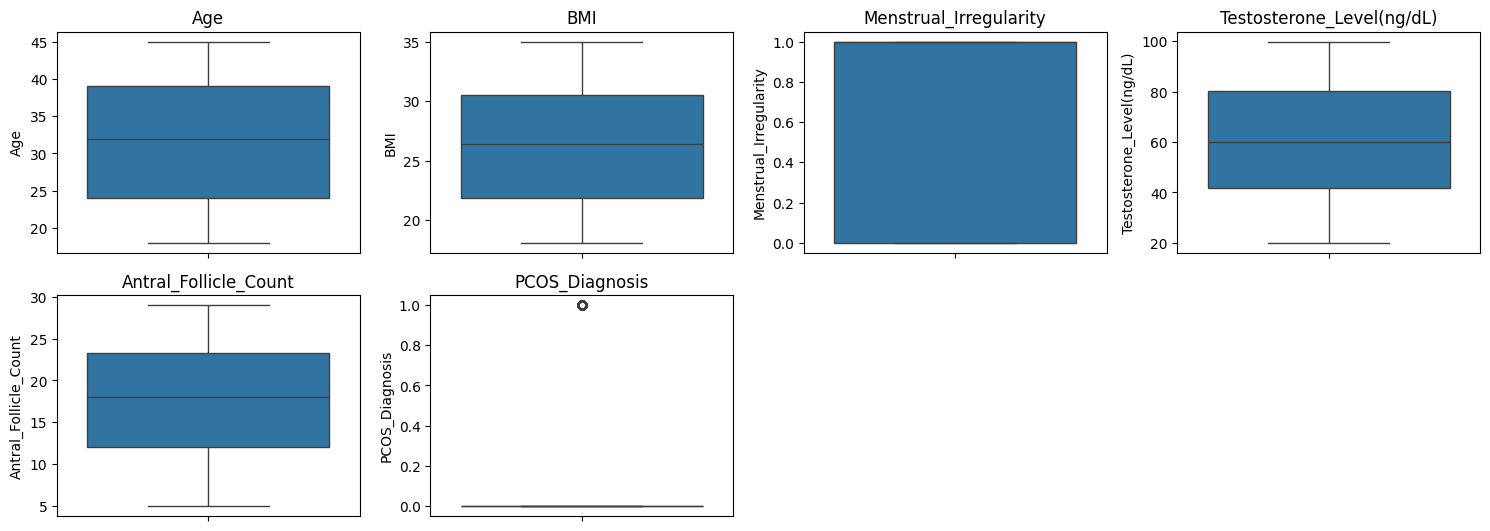

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'PCOS_Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**2. IQR**

In [38]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
BMI: 0 outliers
Menstrual_Irregularity: 0 outliers
Testosterone_Level(ng/dL): 0 outliers
Antral_Follicle_Count: 0 outliers
PCOS_Diagnosis: 199 outliers


Berdasarkan hasil di atas dapat dilihat bahwa data tidak memiliki outlier. Dengan demikian tidak perlu dilakukan penanganan outlier.

# K-NEAREST NEIGHBORS

**Splitting the dataset into the training set and test set**

Split dataset dilakukan untuk membagi dataset menjadi data training dan data testing. Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.

Split dataset dengan ukuran 80:20

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop('PCOS_Diagnosis', axis=1)
y = data['PCOS_Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


In [43]:
print(X_train)

     Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
29    43  18.7                       1                       31.3   
535   43  19.6                       0                       48.8   
695   36  22.1                       0                       23.5   
557   39  26.2                       1                       96.1   
836   33  20.1                       1                       87.9   
..   ...   ...                     ...                        ...   
106   38  22.8                       1                       81.3   
270   28  30.7                       0                       93.1   
860   26  19.6                       1                       68.1   
435   27  21.1                       0                       21.5   
102   33  29.4                       1                       44.3   

     Antral_Follicle_Count  
29                      22  
535                      6  
695                      8  
557                     28  
836                     18

In [44]:
print(y_train)

29     0
535    0
695    0
557    1
836    0
      ..
106    0
270    0
860    0
435    0
102    1
Name: PCOS_Diagnosis, Length: 800, dtype: int64


In [45]:
print(X_test)

     Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
521   33  33.0                       1                       79.9   
737   43  19.4                       0                       20.7   
740   23  20.7                       1                       38.3   
660   22  31.2                       1                       38.0   
411   34  22.6                       0                       80.9   
..   ...   ...                     ...                        ...   
408   21  31.9                       0                       50.0   
332   44  25.0                       0                       22.2   
208   40  34.1                       1                       35.7   
613   35  18.8                       1                       97.1   
78    25  27.7                       1                       79.9   

     Antral_Follicle_Count  
521                      8  
737                     14  
740                     27  
660                     22  
411                     15

In [46]:
print(y_test)

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    0
208    0
613    0
78     1
Name: PCOS_Diagnosis, Length: 200, dtype: int64


**Feature Scaling**

Transformasi data dan Normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun Naive Bayes

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
print(X_train)

[[ 1.33544048 -1.5873654   0.92761259 -1.23353925  0.63451998]
 [ 1.33544048 -1.40290421 -1.07803625 -0.48614354 -1.61654868]
 [ 0.50771865 -0.89051202 -1.07803625 -1.5666642  -1.3351651 ]
 ...
 [-0.67474109 -1.40290421  0.92761259  0.33812716  0.3531364 ]
 [-0.55649512 -1.0954689  -1.07803625 -1.65208085  1.19728714]
 [ 0.15298073  0.6056732   0.92761259 -0.67833101  1.19728714]]


In [49]:
print(X_test.dtype)

float64


**Training the K-NN model on the Training set**

In [50]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions


In [51]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Prediksi KNN berdasarkan model yang dibangun**

Modelling dengan KNN

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [56]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [57]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.015833333333333335
MSE data test: 0.02777777777777778


Hasil Prediksi berdasarkan perhitungan Mean Squared Error

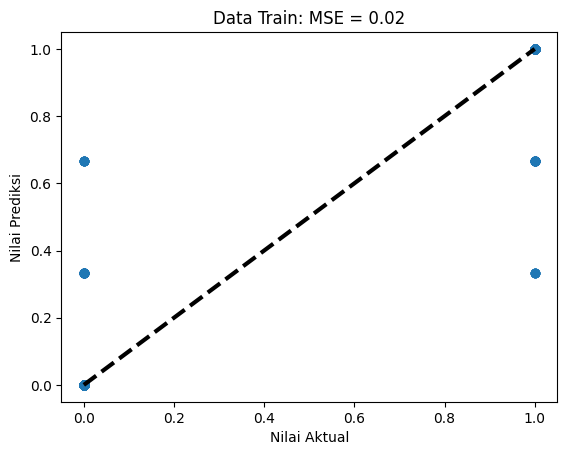

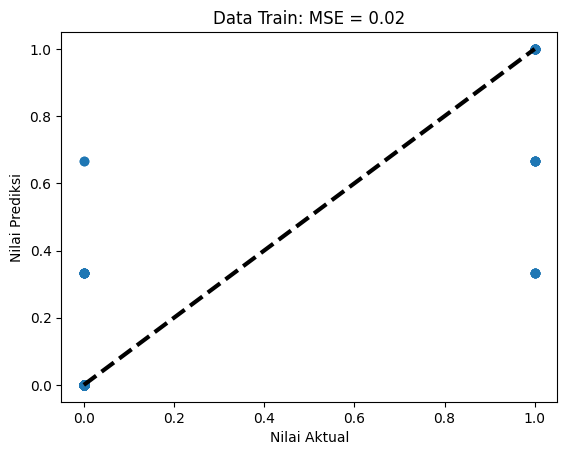

In [58]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Kita akan menggunakan matplotlib untuk membuat scatter plot dari nilai aktual versus nilai prediksi untuk data train dan data test.
Garis diagonal yang ditampilkan pada grafik menggambarkan situasi ideal di mana nilai aktual dan prediksi sama. Jika model KNN berhasil memprediksi dengan baik, titik akan membentuk pola yang hampil lurus mengikuti garis diagonal. Jika nilai MSE rendah, artinya model memiliki tingkat akurasi yang baik

**Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks**

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[158   3]
 [  4  35]]


0.965

In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[158   3]
 [  4  35]]


0.965

Nilai akurasi algoritma KNN adalah 96,5%

# NAIVE BAYES

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [63]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [64]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.6625

In [65]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [66]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.6950


**Membuat model dengan Neural Network**

In [67]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).

Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [68]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200}


In [69]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [70]:
y_pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       161
           1       0.97      0.92      0.95        39

    accuracy                           0.98       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



In [72]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.98

Output 0.98 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.98 berarti bahwa model berhasil memprediksi dengan benar sekitar 98% dari semua sampel pada data uji (y_test) yang telah digunakan.
Hasil ini melebihi akurasi yang ditunjukkan dengan menggunakan KNN yaitu 96,5%. Dengan demikian dalam kasus ini klasifikasi dengan menggunakan Naive Bayes lebih akurat daripada menggunakan KNN.